In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import scipy.stats as stat
from matplotlib import pylab

In [2]:
df = pd.read_csv('NewData.csv')

In [3]:
df.head(3)

,vid,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,Ugx18OdhnjkAtm4_kvF4AaABAg,0.204100,0.270961,4,0.000000,1,19,0,0,0.0,5178343.0,0.250000,0,0,0,0.0,0
1,Ugy3Fx_GQfOtmO9C2kF4AaABAg,0.261605,0.249003,15,0.000000,1,86,0,0,0.0,3913982.0,0.000000,0,0,0,0.0,0
2,UgxCTzZDv-L9XYzGWEB4AaABAg,0.367258,0.362855,31,0.032258,1,167,0,0,0.0,3818729.0,0.064516,0,0,0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vid                   10635 non-null  object 
 1   sim_content           10635 non-null  float64
 2   sim_comment           10635 non-null  float64
 3   word_count            10635 non-null  int64  
 4   duplicate_word_ratio  10635 non-null  float64
 5   no_of_sentences       10635 non-null  int64  
 6   length_of_comment     10635 non-null  int64  
 7   num_of_punctuations   10635 non-null  int64  
 8   is_period_sequence    10635 non-null  int64  
 9   stop_word_ratio       10635 non-null  float64
 10  post_coment_gap       10635 non-null  float64
 11  black_word_count      10635 non-null  float64
 12  is_link               10635 non-null  int64  
 13  is_youtube_link       10635 non-null  int64  
 14  is_number             10635 non-null  int64  
 15  comment_duplication

In [5]:
# all of features are in float and int data types and no missing values

<AxesSubplot:>

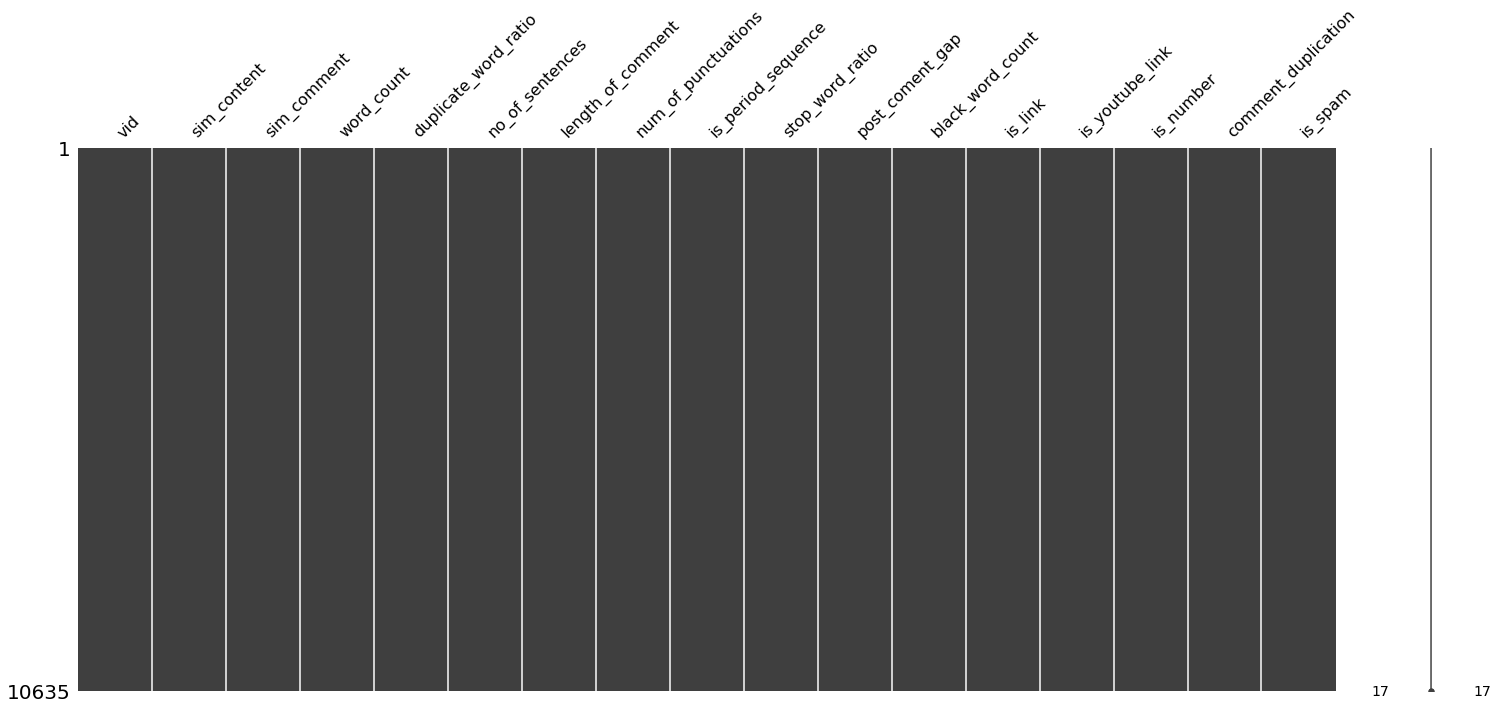

In [5]:
msn.matrix(df)

In [6]:
df.columns

Index(['vid', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'is_spam'],
      dtype='object')

In [10]:
df1 = df[['sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number',  'comment_duplication', 'is_spam']]

In [11]:
continous_features = [x for x in df1.columns if df1[x].dtype == 'float64']

In [12]:
continous_features

['sim_content',
 'sim_comment',
 'duplicate_word_ratio',
 'stop_word_ratio',
 'post_coment_gap',
 'black_word_count',
 'comment_duplication']

In [13]:
discreate_features = [x for x in df.columns if x not in continous_features if x not in ['is_spam','vid'] ]

In [14]:
discreate_features

['word_count',
 'no_of_sentences',
 'length_of_comment',
 'num_of_punctuations',
 'is_period_sequence',
 'is_link',
 'is_youtube_link',
 'is_number']

### Handle Outliers

In [25]:
df2 = df.copy()

In [14]:
# 'sim_content'

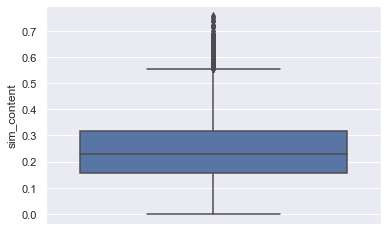

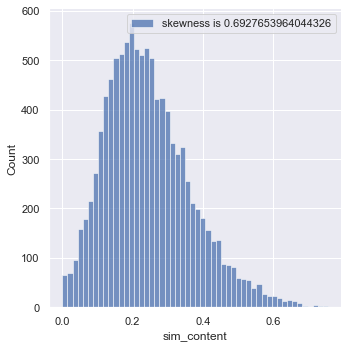

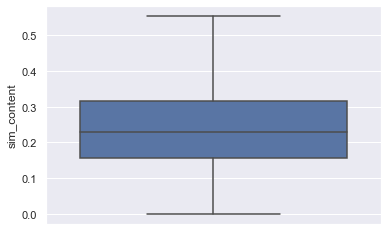

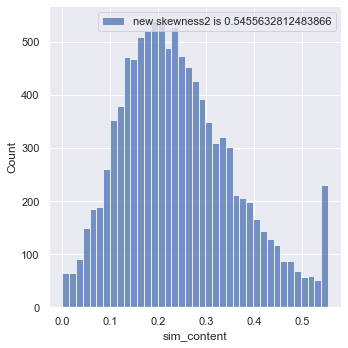

In [26]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot( data=df2['sim_content'],label="skewness is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['sim_content'].quantile(0.1)
y = df2['sim_content'].quantile(0.982)
#df2['sim_content']= np.where(df2['sim_content'] < x,  x,df2['sim_content'])
df2['sim_content']= np.where(df2['sim_content'] > y,  y,df2['sim_content'])


sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot(data=df2['sim_content'],label="new skewness2 is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()

In [31]:
# 'sim_comment'
df3 = df2.copy()


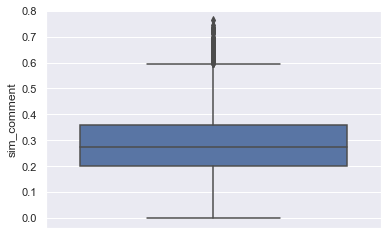

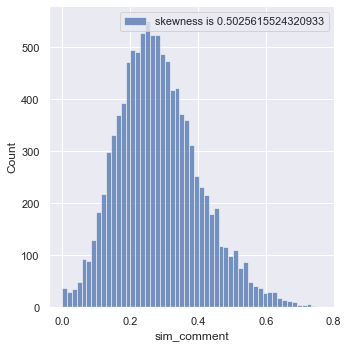

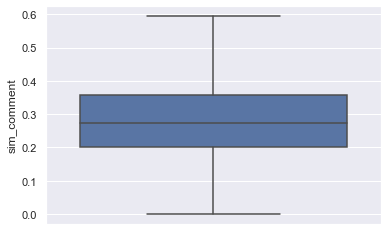

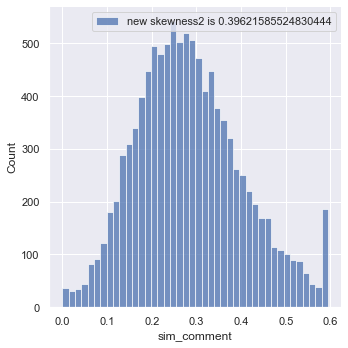

In [32]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df3['sim_comment'])
plt.show()
sns.displot( data=df3['sim_comment'],label="skewness is {}".format(df3['sim_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df3['sin_comment'].quantile(0.03)
y = df3['sim_comment'].quantile(0.986)
#df3['sin_comment']= np.where(df3['sin_comment'] < x,  x,df3['sin_comment'])
df3['sim_comment']= np.where(df3['sim_comment'] > y,  y,df3['sim_comment'])


sns.boxplot(y=df3['sim_comment'])
plt.show()
sns.displot(data=df3['sim_comment'],label="new skewness2 is {}".format(df3['sim_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [33]:
# 'word_count'
df4 = df3.copy()

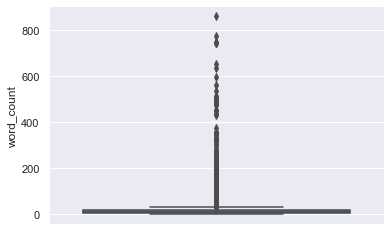

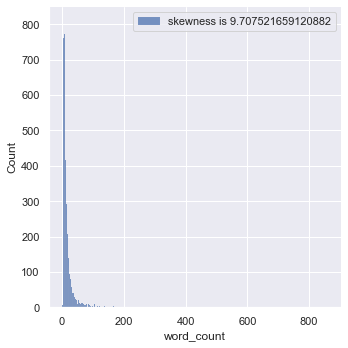

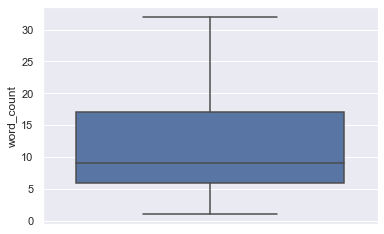

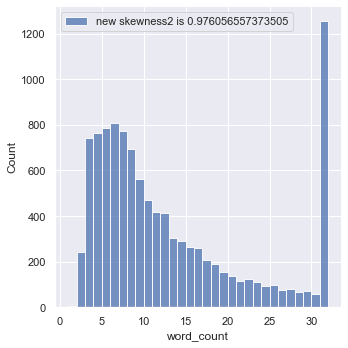

In [34]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot( data=df4['word_count'],label="skewness is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['word_count'].quantile(0.1)
y = df4['word_count'].quantile(0.89)
#df2['word_count']= np.where(df2['word_count'] < x,  x,df2['word_count'])
df4['word_count']= np.where(df4['word_count'] > y,  y,df4['word_count'])


sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot(data=df4['word_count'],label="new skewness2 is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [35]:
# 'duplicate_word_ratio'
df5 = df4.copy()

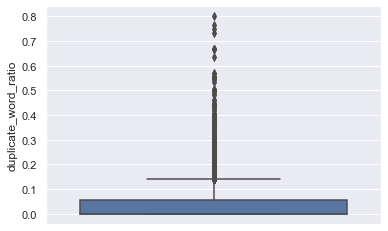

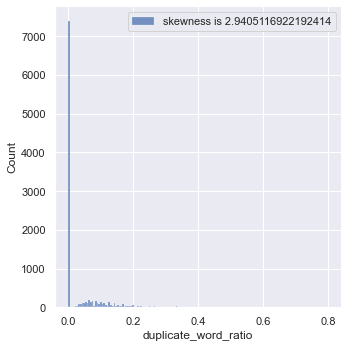

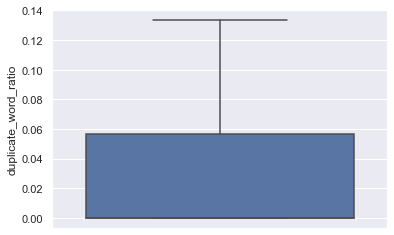

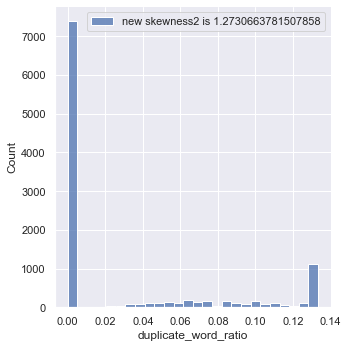

In [36]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot( data=df5['duplicate_word_ratio'],label="skewness is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['duplicate_word_ratio'].quantile(0.1)
y = df5['duplicate_word_ratio'].quantile(0.9)
#df2['duplicate_word_ratiot']= np.where(df2['duplicate_word_ratio'] < x,  x,df2['duplicate_word_ratio'])
df5['duplicate_word_ratio']= np.where(df5['duplicate_word_ratio'] > y,  y,df5['duplicate_word_ratio'])


sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot(data=df5['duplicate_word_ratio'],label="new skewness2 is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [37]:
# 'no_of_sentences'
df6 = df5.copy()

In [38]:
df6['no_of_sentences'].value_counts()

1     7529
2     1208
3      628
4      370
5      254
6      147
7       93
8       85
9       43
10      42
11      38
12      32
13      25
15      13
18      12
14      12
20      11
16      10
19       9
17       7
23       6
31       5
70       4
22       4
24       4
28       4
21       3
30       3
39       3
36       3
74       3
38       2
25       2
29       2
73       2
27       2
44       1
33       1
41       1
49       1
66       1
46       1
96       1
90       1
68       1
40       1
93       1
61       1
59       1
72       1
47       1
Name: no_of_sentences, dtype: int64

In [39]:
df6['no_of_sentences'] = np.where(df6['no_of_sentences']>4,4,df6['no_of_sentences'])

In [40]:
df6['no_of_sentences'].value_counts()

1    7529
4    1270
2    1208
3     628
Name: no_of_sentences, dtype: int64

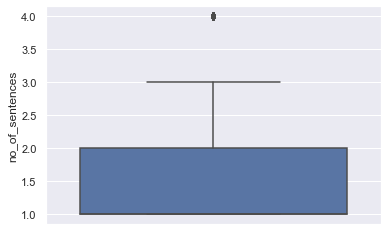

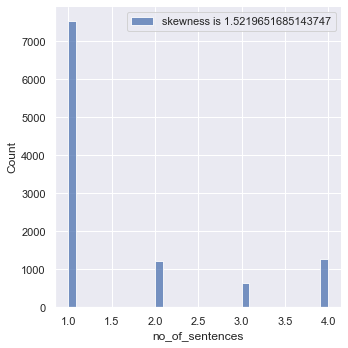

In [41]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df6['no_of_sentences'])
plt.show()
sns.displot( data=df6['no_of_sentences'],label="skewness is {}".format(df6['no_of_sentences'].skew()))
plt.legend(loc='best')
plt.show()


#x = df6['no_of_sentences'].quantile(0.1)
#y = df6['no_of_sentences'].quantile(0.7)
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] < x,  x,df6['no_of_sentences'])
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] > y,  y,df6['no_of_sentences'])


#sns.boxplot(y=df6['no_of_sentences'])
#plt.show()
#sns.displot(data=df6['no_of_sentences'],label="new skewness2 is {}".format(df6['no_of_sentences'].skew()))
#plt.legend(loc='best')
#plt.show()

In [42]:
# 'length_of_comment'
df7 = df6.copy()

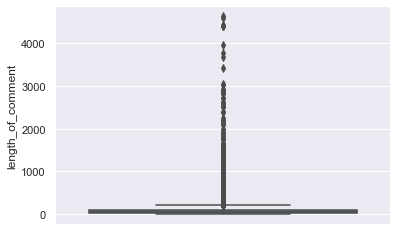

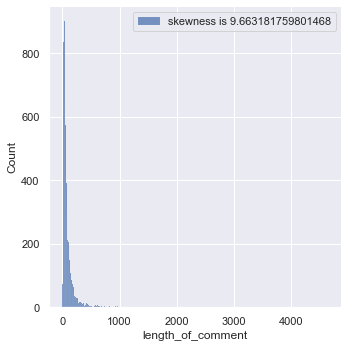

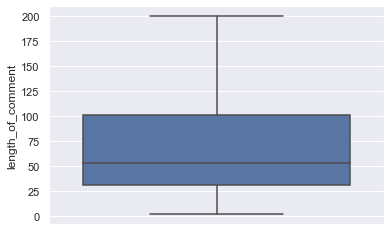

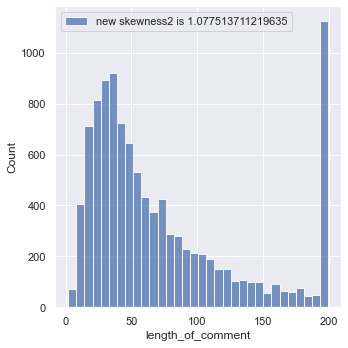

In [43]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot( data=df7['length_of_comment'],label="skewness is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df7['length_of_comment'].quantile(0.1)
y = df7['length_of_comment'].quantile(0.9)
#df7['length_of_comment']= np.where(df7['length_of_comment'] < x,  x,df7['length_of_comment'])
df7['length_of_comment']= np.where(df7['length_of_comment'] > y,  y,df7['length_of_comment'])


sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot(data=df7['length_of_comment'],label="new skewness2 is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [44]:
# 'num_of_punctuations'
df8 = df7.copy()

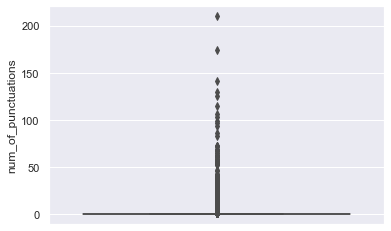

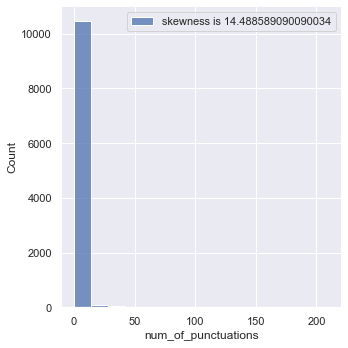

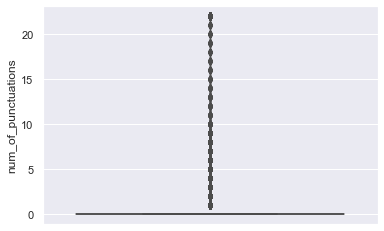

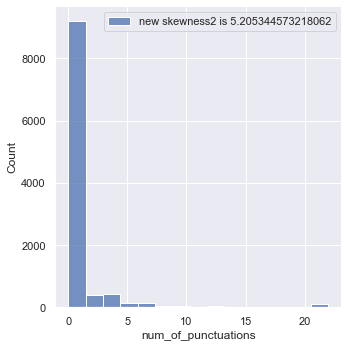

In [45]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot( data=df8['num_of_punctuations'],label="skewness is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()


#x = df8['num_of_punctuations'].quantile(0.1)
y = df8['num_of_punctuations'].quantile(0.99)
#df8['num_of_punctuations']= np.where(df8['num_of_punctuationst'] < x,  x,df8['num_of_punctuations'])
df8['num_of_punctuations']= np.where(df8['num_of_punctuations'] > y,  y,df8['num_of_punctuations'])


sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot(data=df8['num_of_punctuations'],label="new skewness2 is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()

In [47]:
df8['num_of_punctuations'].value_counts()

0.0     8201
1.0     1000
2.0      406
3.0      225
4.0      202
5.0      145
22.0     111
6.0       76
7.0       56
8.0       55
9.0       35
10.0      21
13.0      16
11.0      15
12.0      14
14.0      11
15.0       9
19.0       8
17.0       7
16.0       7
21.0       5
20.0       5
18.0       5
Name: num_of_punctuations, dtype: int64

In [48]:
df8['num_of_punctuations'] = np.where(df8['num_of_punctuations']>10,10,df8['num_of_punctuations'])

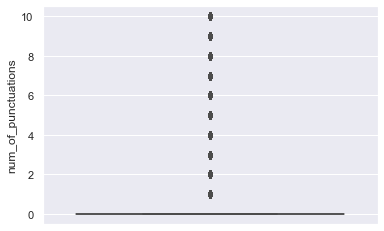

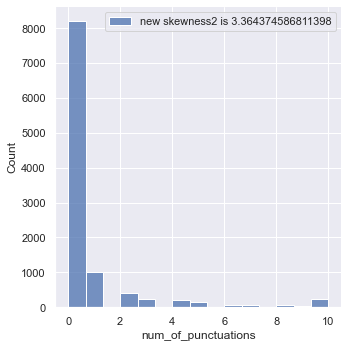

In [49]:
sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot(data=df8['num_of_punctuations'],label="new skewness2 is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()

In [50]:
# 'stop_word_ratio'
df9 = df8.copy()

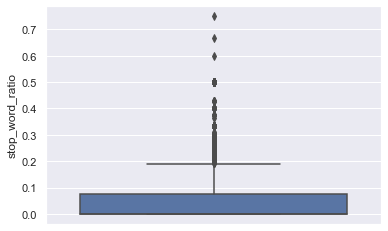

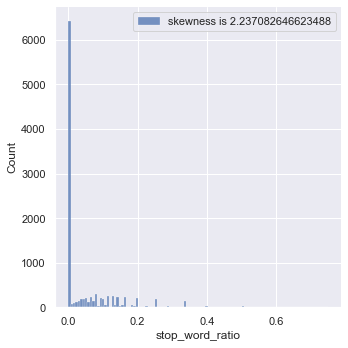

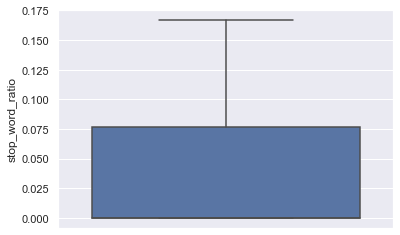

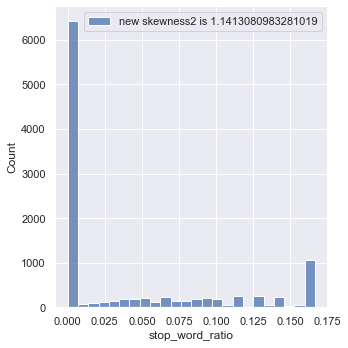

In [51]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot( data=df9['stop_word_ratio'],label="skewness is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df9['stop_word_ratio'].quantile(0.1)
y = df9['stop_word_ratio'].quantile(0.92)
#df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] < x,  x,df9['stop_word_ratio'])
df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] > y,  y,df9['stop_word_ratio'])


sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot(data=df9['stop_word_ratio'],label="new skewness2 is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [52]:
# 'post_coment_gap'
df10 = df9.copy()

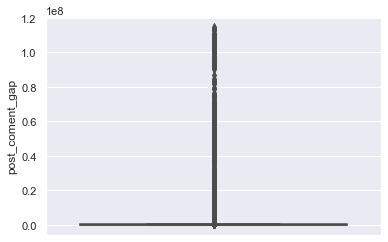

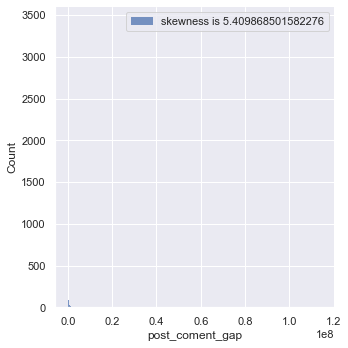

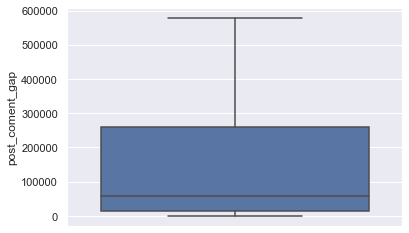

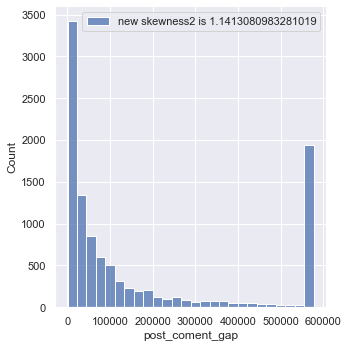

In [53]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot( data=df10['post_coment_gap'],label="skewness is {}".format(df10['post_coment_gap'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df10['post_coment_gap'].quantile(0.82)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df10['post_coment_gap']= np.where(df10['post_coment_gap'] > y,  y,df10['post_coment_gap'])


sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot(data=df10['post_coment_gap'],label="new skewness2 is {}".format(df10['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()

In [67]:
# 'black_word_ratio'
df11 = df10.copy()

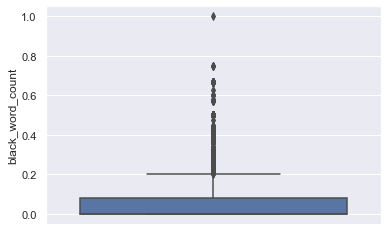

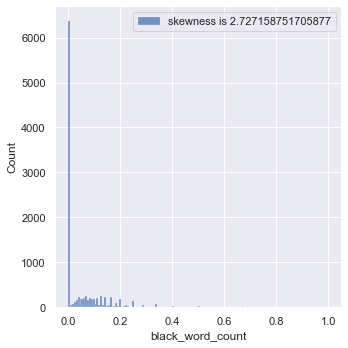

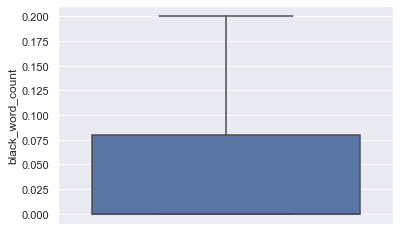

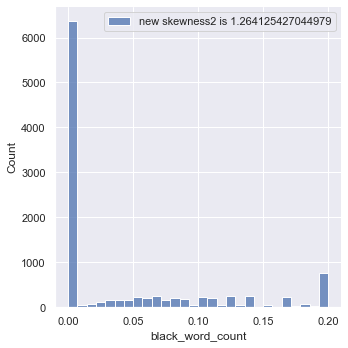

In [68]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot( data=df11['black_word_count'],label="skewness is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df11['black_word_count'].quantile(0.94)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df11['black_word_count']= np.where(df11['black_word_count'] > y,  y,df11['black_word_count'])


sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot(data=df11['black_word_count'],label="new skewness2 is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [37]:
# outliers handle in features 

In [38]:
#df1['num_of_punctuations'].value_counts().plot(kind='bar')

### find the realtionship between categoricl features and target variable

#### 'word_count' vs 'classifier_val'

In [69]:
pd.pivot_table(df11, index = ['is_spam'], values = ['word_count'] ,aggfunc='mean') 

,word_count
is_spam,
0,12.269062
1,19.024631


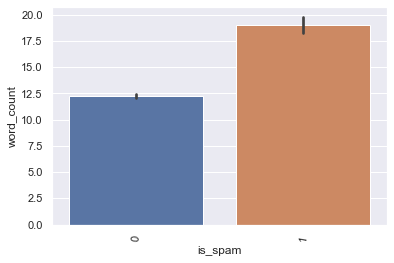

In [70]:
sns.barplot(data = df11,x='is_spam', y ='word_count' )
plt.xticks(rotation=80)
plt.show()

In [41]:
#class_1 = df11.groupby('classifier_val').get_group(1)
#class_0 = df11.groupby('classifier_val').get_group(0)


<AxesSubplot:xlabel='word_count', ylabel='is_spam'>

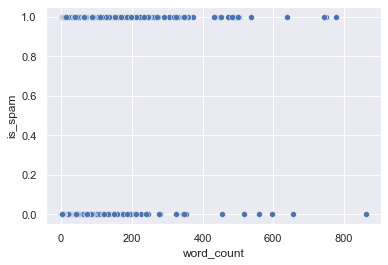

In [71]:
sns.scatterplot(data=df, x='word_count',y='is_spam')

In [43]:
# we can see when increase the number of words, the probability of being a spam also going to high

#### 'no_of_sentences' vs 'classifier_val'

In [72]:
pd.pivot_table(data=df11, index=['is_spam'], values=['no_of_sentences'], aggfunc='mean')

,no_of_sentences
is_spam,
0,1.526927
1,2.352217


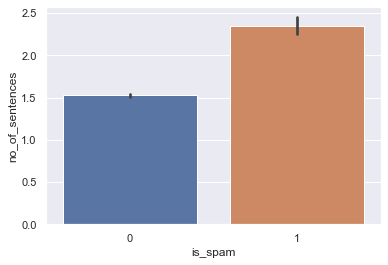

In [73]:
sns.barplot(data=df11, x='is_spam',y='no_of_sentences')
plt.show()

<AxesSubplot:xlabel='no_of_sentences', ylabel='is_spam'>

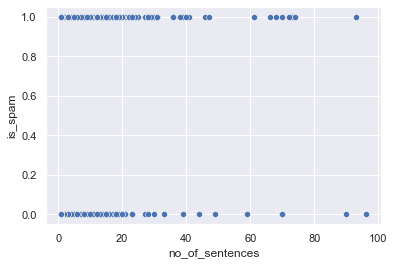

In [74]:
sns.scatterplot(data=df, x='no_of_sentences',y='is_spam')

In [47]:
# we can see when increase the number of sentences ,probabiliy of being a spam also going to high

#### 'length_of_comment' vs 'classifier_val'

In [75]:
pd.pivot_table(data=df11, index=['is_spam'], values=['length_of_comment'], aggfunc='mean')

,length_of_comment
is_spam,
0,70.949058
1,116.904926


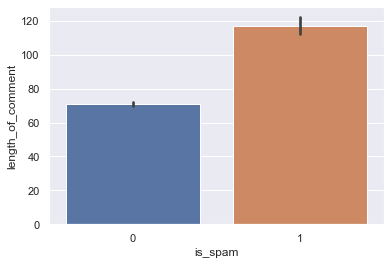

In [76]:
sns.barplot(data=df11, x='is_spam', y='length_of_comment')
plt.show()

<AxesSubplot:xlabel='length_of_comment', ylabel='is_spam'>

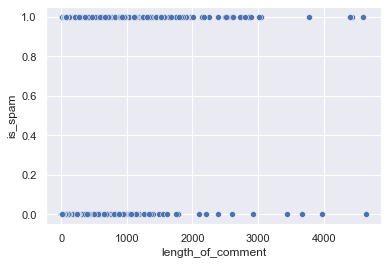

In [77]:
sns.scatterplot(data=df,x='length_of_comment',y='is_spam')

In [51]:
# we can see when increase the length of a comment ,the probability of being a spam also going to high

#### 'num_of_punctuations' vs 'classifier_val'

In [78]:
pd.pivot_table(data=df11, index=['is_spam'],values=['num_of_punctuations'],aggfunc='mean')

,num_of_punctuations
is_spam,
0,0.484475
1,3.945813


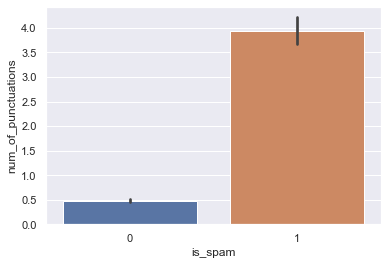

In [79]:
sns.barplot(data=df11, x='is_spam',y='num_of_punctuations')
plt.show()

<AxesSubplot:xlabel='num_of_punctuations', ylabel='is_spam'>

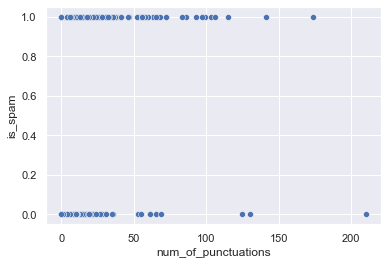

In [80]:
sns.scatterplot(data=df,x='num_of_punctuations',y='is_spam')

In [55]:
# we can see when increase the number of punctuations ,the probability of being a spam also going to high

#### 'is_period_sequence' vs 'classifier_val'

In [82]:
pd.pivot_table(data=df11, index=['is_period_sequence','is_spam'],values=['vid'],aggfunc='count')

vid
is_period_sequence is_spam      
0                  0        7194
                   1         591
1                  0        2629
                   1         221

In [83]:
group_from_dots = df11.groupby(['is_period_sequence'])

#get a data frame with period_sequence value == 1
dfs_dots = group_from_dots.get_group(1)

dfs_dots['is_spam'].value_counts()

0    2629
1     221
Name: is_spam, dtype: int64

In [84]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
filt = (dfs_dots['is_spam'] == 1)
spam = dfs_dots[filt]['is_period_sequence'].count()
filt = (dfs_dots['is_spam'] == 0)
ham = dfs_dots[filt]['is_period_sequence'].count()

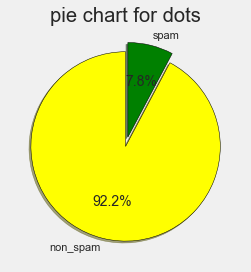

In [85]:
slices = [ham,spam]
labels = ['non_spam', 'spam']
colors = [ 'yellow','green',]
explode = [0,0.1]
plt.pie(slices, labels=labels, colors=colors, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("pie chart for dots")
#plt.savefig('dot_pie.png')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='is_period_sequence', ylabel='count'>

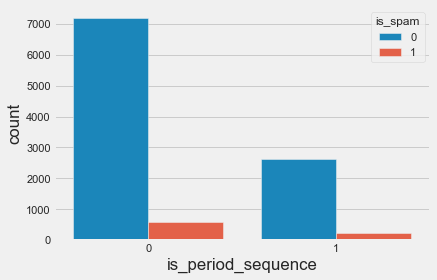

In [86]:
sns.countplot(x="is_period_sequence", data=df11,hue='is_spam')

In [61]:
# we can see when a comment has a sequance of dots ..it has a high probabality for being a ham comment

#### 'black_word_count' vs 'classifier_val'

In [87]:
pd.pivot_table(data=df11, index=['is_spam'],values=['black_word_count'],aggfunc='mean')

,black_word_count
is_spam,
0,0.038131
1,0.118417


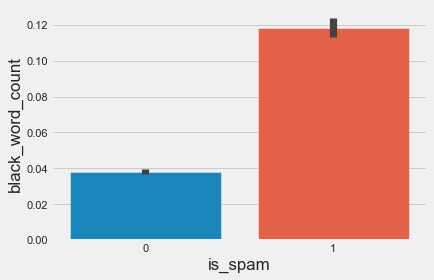

In [88]:
sns.barplot(data=df11, x='is_spam',y='black_word_count')
plt.show()

<AxesSubplot:xlabel='black_word_count', ylabel='is_spam'>

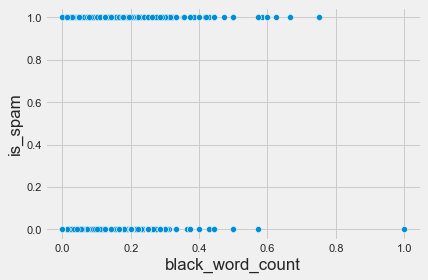

In [89]:
sns.scatterplot(data=df,x='black_word_count',y='is_spam')

In [65]:
# we can see spam comments have a high number of black words counts

#### 'is_link' vs 'classifier_val'

In [91]:
pd.pivot_table(data=df11, index=['is_spam','is_link'],values=['vid'],aggfunc='count')

vid
is_spam is_link      
0       0        9776
        1          47
1       0         436
        1         376

<AxesSubplot:xlabel='is_link', ylabel='count'>

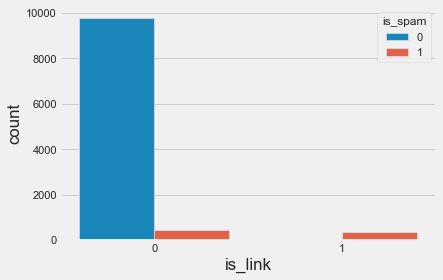

In [92]:
sns.countplot(x="is_link", data=df11,hue='is_spam')

In [68]:
# if a comment has a link then it has a high probability for being a spam comment

#### 'is_youtube_link' vs 'classifier_val'

In [94]:
pd.pivot_table(data=df11, index=['is_spam','is_youtube_link'],values=['vid'],aggfunc='count')

vid
is_spam is_youtube_link      
0       0                9786
        1                  37
1       0                 608
        1                 204

<AxesSubplot:xlabel='is_youtube_link', ylabel='count'>

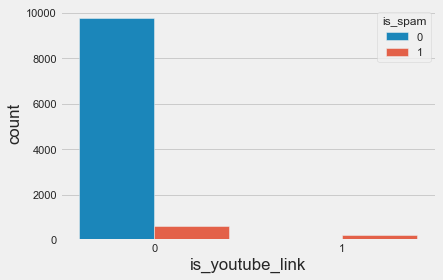

In [95]:
sns.countplot(x="is_youtube_link", data=df11,hue='is_spam')

In [71]:
# if a comment has a youtube link it has a high probability for being a spam comments

In [96]:
pd.pivot_table(data=df11, index=['is_link','is_youtube_link'], values=['vid',],columns=['is_spam'],aggfunc='count',margins=True)

vid            
is_spam                     0    1    All
is_link is_youtube_link                  
0       0                9776  436  10212
1       0                  10  172    182
        1                  37  204    241
All                      9823  812  10635

#### 'is_number' vs 'classifier_val'

In [97]:
pd.pivot_table(data=df11, index=['is_spam','is_number'],values=['vid'],aggfunc='count')

vid
is_spam is_number      
0       0          9813
        1            10
1       0           737
        1            75

<AxesSubplot:xlabel='is_number', ylabel='count'>

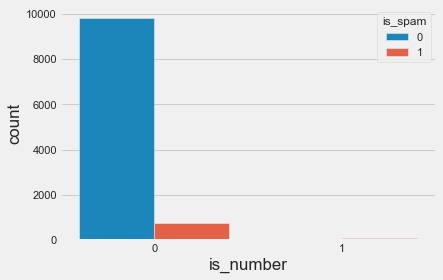

In [98]:
sns.countplot(x="is_number", data=df11,hue='is_spam')

In [75]:
# we can see when a comment has a phone number information then it has a high probability for being a spam

In [207]:
#pd.pivot_table(data=df11, index=['classifier_val','is_mail'],values=['com'],aggfunc='count')

In [208]:
#sns.countplot(x="is_mail", data=df11,hue='classifier_val')

In [78]:
# no mails in dataset 

In [209]:
#df11.corr()

### find the realtionship between continouse features and target variable

In [99]:
continous_features

['sim_content',
 'sim_comment',
 'duplicate_word_ratio',
 'stop_word_ratio',
 'post_coment_gap',
 'black_word_count',
 'comment_duplication']

In [100]:
pd.pivot_table(df11, index = 'is_spam', values = continous_features , aggfunc='mean' ,margins=True)

,black_word_count,comment_duplication,duplicate_word_ratio,post_coment_gap,sim_comment,sim_content,stop_word_ratio
is_spam,,,,,,,
0,0.038131,0.009777,0.027068,163114.012754,0.283210,0.240993,0.041038
1,0.118417,0.206933,0.056343,266010.735369,0.299616,0.265643,0.032662
All,0.044261,0.024831,0.029304,170970.349262,0.284463,0.242875,0.040398


In [82]:
## sim_content

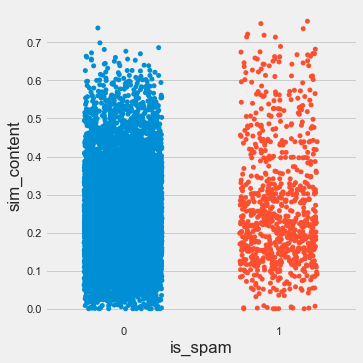

In [101]:
#sns.scatterplot(data=df, y='sim_content',x='classifier_val')
sns.catplot(data=df, y='sim_content',x='is_spam',jitter=0.25)
#plt.xticks(rotation=80)

In [84]:
# we can see lot of spam comments have in range 0.1 - 0.34
# Ham comments have 0.04 - 0.5 
# therefor usually ham comments have a better cos similerity with it's content

In [85]:
# sim_comment

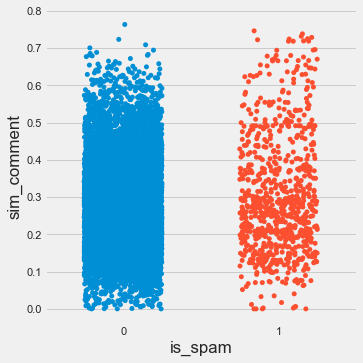

In [103]:
sns.catplot(data=df, y='sim_comment',x='is_spam',jitter=0.25)

In [87]:
# we can see lot of spam comments have in range 0.15 - 0.32
# Ham comments have 0.04 - 0.55 
# therefor usually ham comments have a better cos similerity with it's sourounding comments

In [88]:
# stop_word_ratio

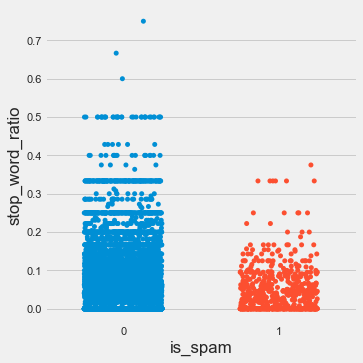

In [104]:
sns.catplot(data=df, y='stop_word_ratio',x='is_spam',jitter=0.25)

In [90]:
# spam comments have a low number of stop words ratio

In [91]:
# post_coment_gap

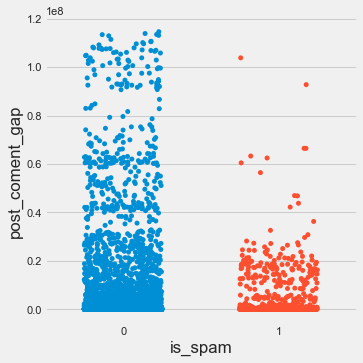

In [105]:
sns.catplot(data=df, y='post_coment_gap',x='is_spam',jitter=0.25)

In [93]:
# we can see lot of spam comments have in range 0.001 - 0.01
# Ham comments have 0.001 - 0. 2
# we can conclude spam comments have a high probability of having a less time gap of (post - comment)

In [94]:
# duplicate_word_ratio

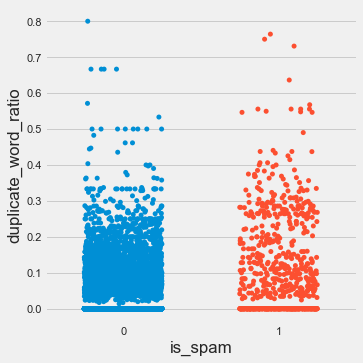

In [106]:
sns.catplot(data=df, y='duplicate_word_ratio',x='is_spam',jitter=0.25)

In [96]:
# ham comments -> 0 - 0.2
# spam comments -> it has a several areas 0 to 0.01 , 0.05 to 0.15 , 0.28 to 0.3

In [107]:
# black_word_count

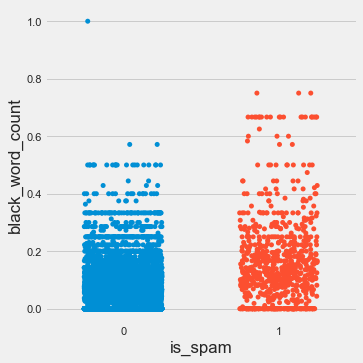

In [108]:
sns.catplot(data=df, y='black_word_count',x='is_spam',jitter=0.25)

In [217]:
# Feature correaltion

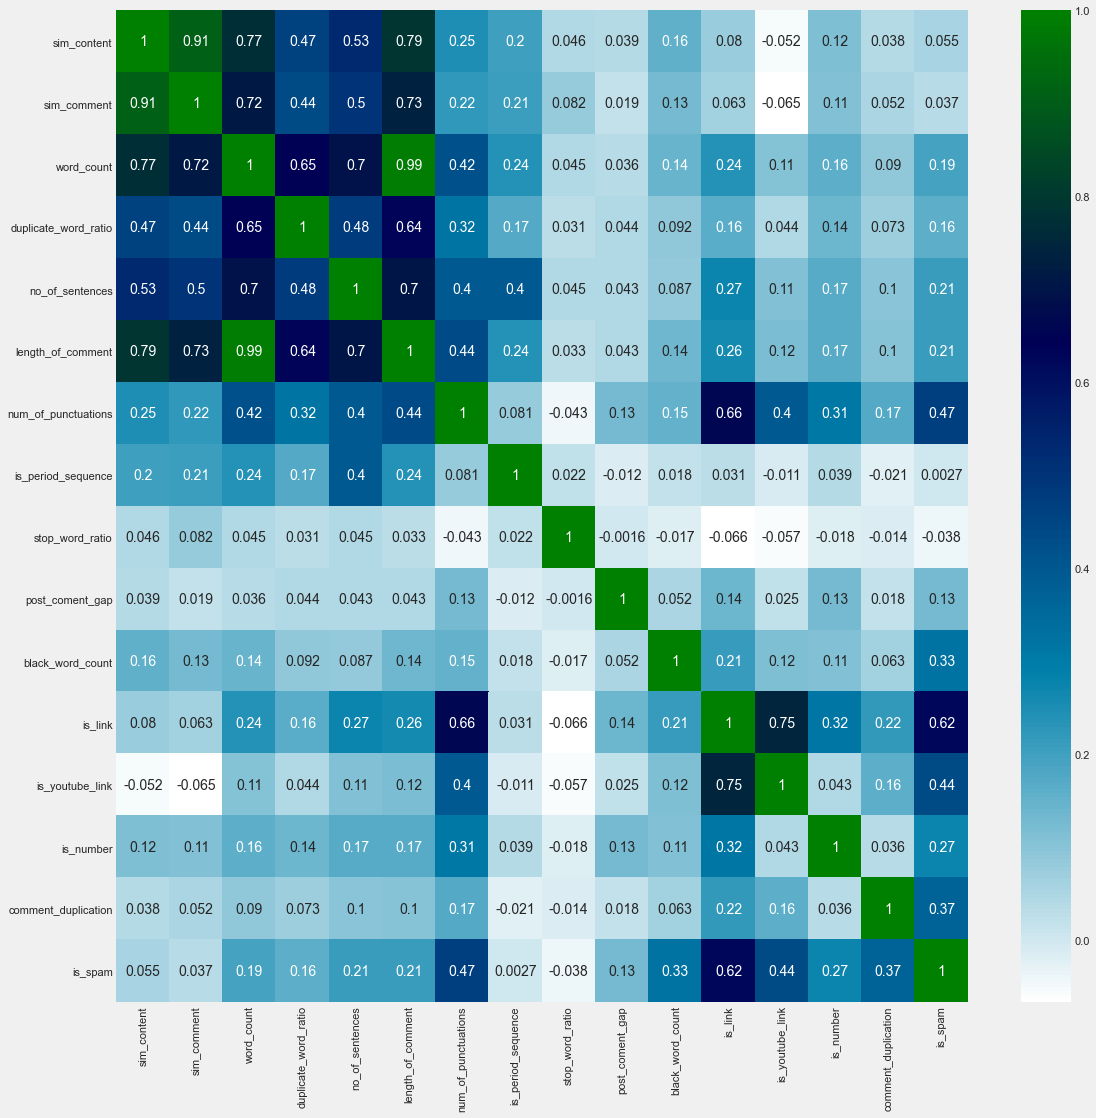

In [109]:
plt.figure(figsize=(17,17))
sns.heatmap(df11.corr(),annot=True,cmap='ocean_r')
plt.show()

### Data distribution

In [110]:
d_columns = [x for x in df11.columns if x!= 'vid']

<Figure size 2880x2880 with 0 Axes>

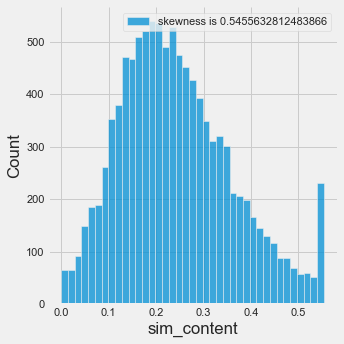

<Figure size 2880x2880 with 0 Axes>

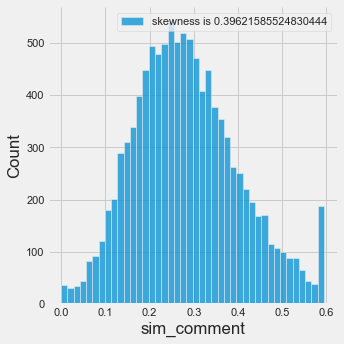

<Figure size 2880x2880 with 0 Axes>

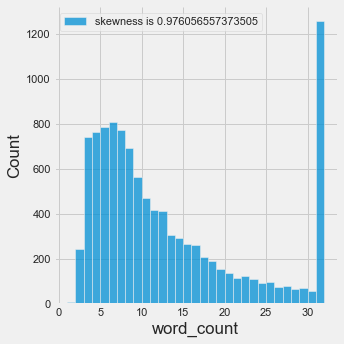

<Figure size 2880x2880 with 0 Axes>

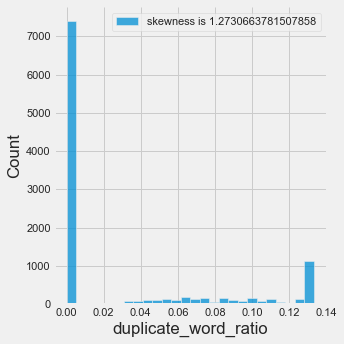

<Figure size 2880x2880 with 0 Axes>

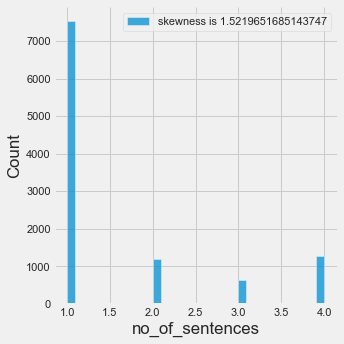

<Figure size 2880x2880 with 0 Axes>

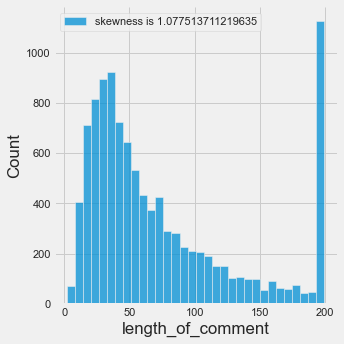

<Figure size 2880x2880 with 0 Axes>

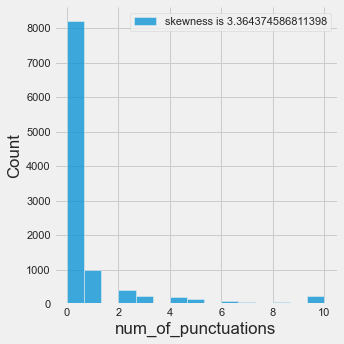

<Figure size 2880x2880 with 0 Axes>

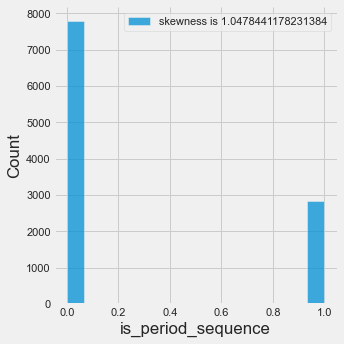

<Figure size 2880x2880 with 0 Axes>

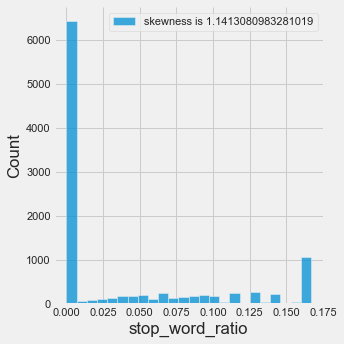

<Figure size 2880x2880 with 0 Axes>

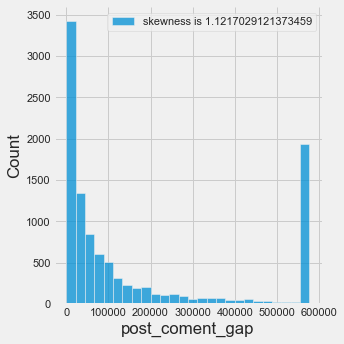

<Figure size 2880x2880 with 0 Axes>

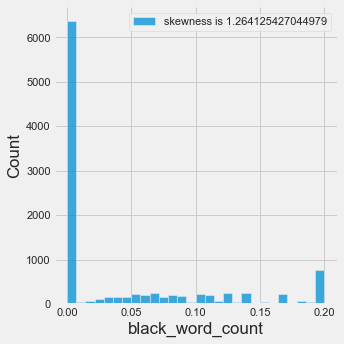

<Figure size 2880x2880 with 0 Axes>

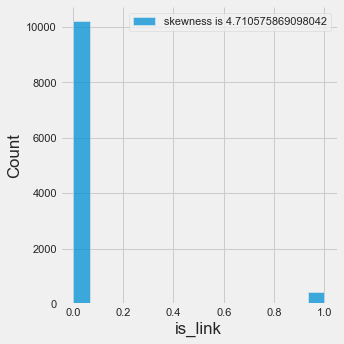

<Figure size 2880x2880 with 0 Axes>

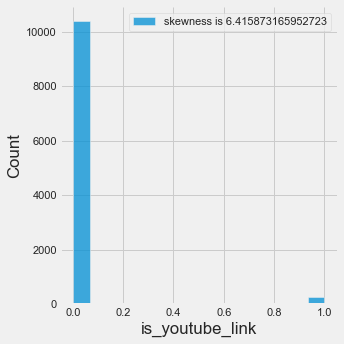

<Figure size 2880x2880 with 0 Axes>

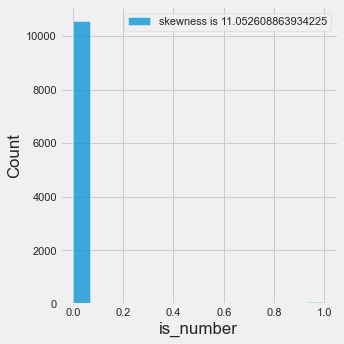

<Figure size 2880x2880 with 0 Axes>

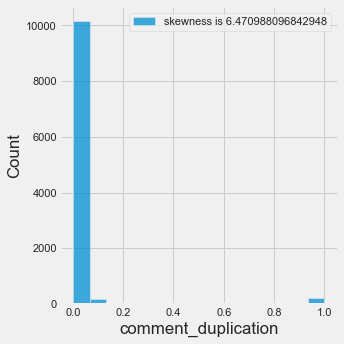

<Figure size 2880x2880 with 0 Axes>

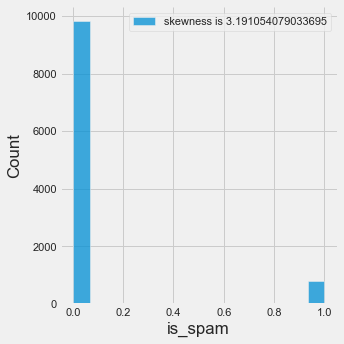

In [111]:
for x in d_columns:
    plt.figure(figsize=(40,40))
    sns.displot(df11[x],label="skewness is {}".format(df11[x].skew()),stat="count")
    plt.legend(loc='best')
    plt.show()

### Data transformation

Here we gonna use few trnformation techniques to find the best one for each features

1) Logarithmic transformation <br>
2) Reciprocal transformation <br>
3) Square root transformation <br>
4) Exponential transformation (more general, you can use any exponent) <br>
5) Boxcox transformation <br>

 

In [112]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    print("skewness is {}".format(df[feature].skew()))
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [117]:
# 'sim_content'
df12 = df11.copy()

skewness is 0.31978126574064714


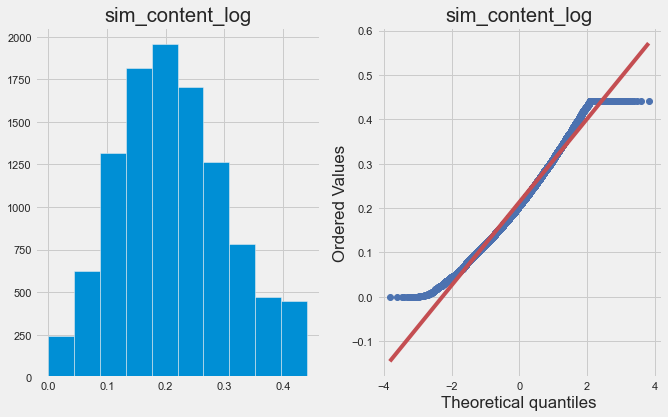

skewness is -0.22545371015187887


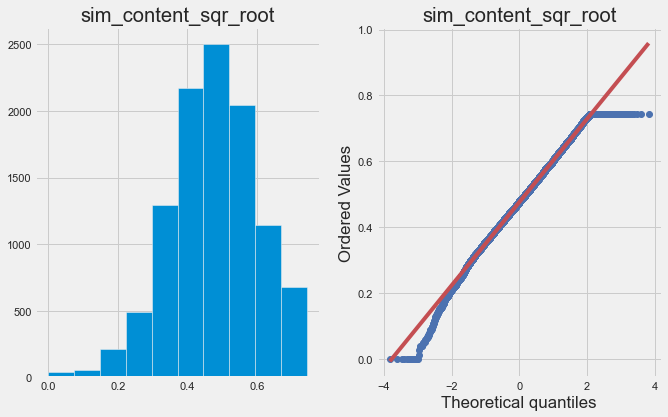

skewness is 1.5593382067016415


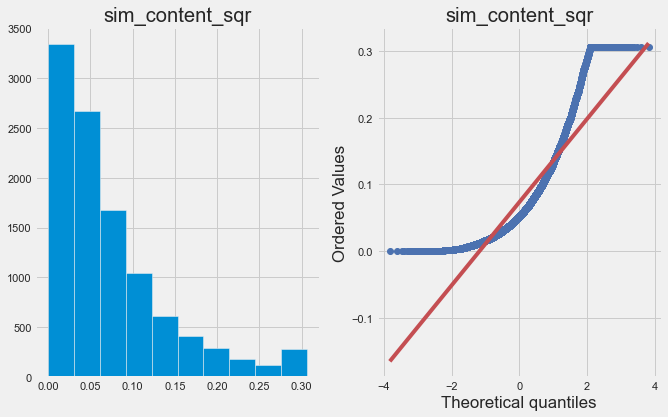

skewness is 0.33009360665385673


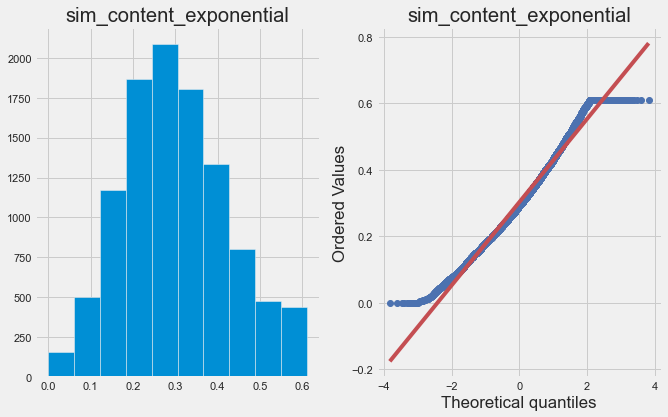

In [118]:
for i in ['sim_content']:
    df12[i+'_log']=np.log(df12[i]+1)
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    #plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    #df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    #plot_data(df12,i+'_Boxcox')

In [ ]:
# exponential transformation is better for sim_content
# we gonna add it to df11

skewness is 0.33009360665385673


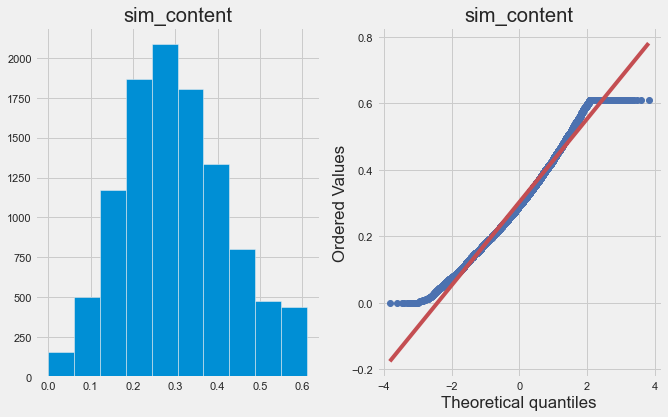

In [119]:
df11['sim_content']=df11['sim_content']**(1/1.2)
plot_data(df11,'sim_content')

In [126]:
# 'sim_comment'
df12 =df11.copy()

skewness is 0.15881193601996504


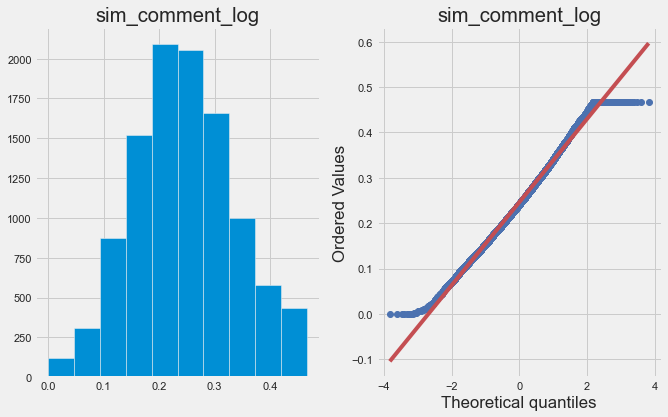

skewness is -0.3372658065141312


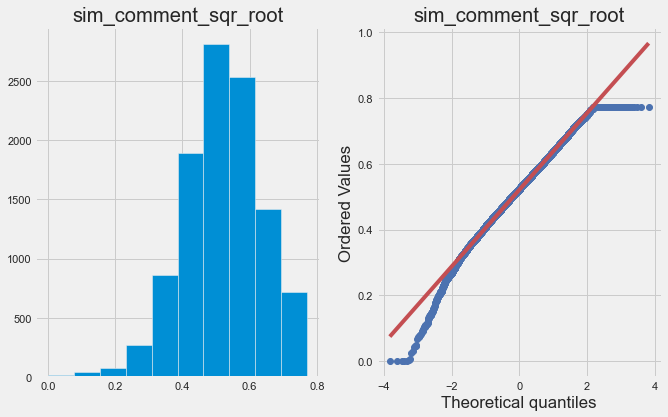

skewness is 1.356080857093514


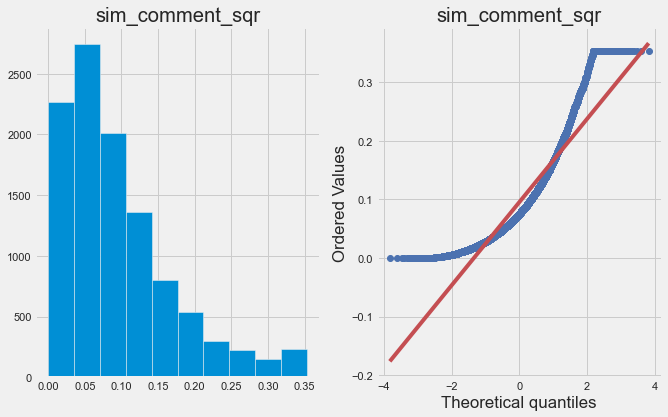

skewness is 0.1922007179811117


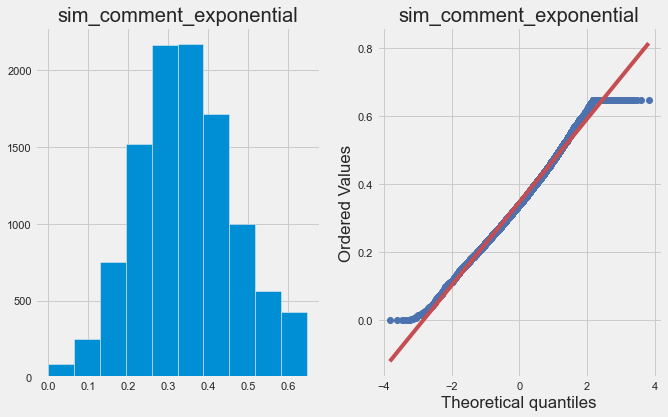

In [127]:
for i in ['sim_comment']:
    df12[i+'_log']=np.log(df12[i]+1)
    plot_data(df12,i+'_log')
    
    #df12[i+'_reciprocal']=1/df12[i]
    #plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    #df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    #plot_data(df12,i+'_Boxcox')

In [ ]:
# log transformation is better for sin_comment
# we gonna add it to df11

skewness is 0.15881193601996504


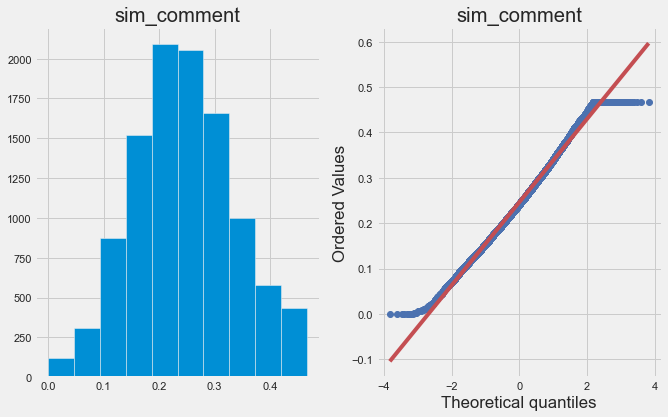

In [128]:
df11['sim_comment']=np.log(df11[i]+1)
plot_data(df11,'sim_comment')

In [129]:
# 'word_count'
df12 = df11.copy()

skewness is -0.02468052608698387


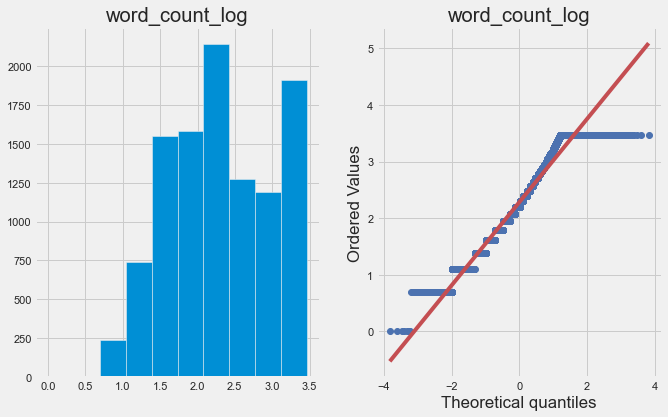

skewness is 1.7500676133690305


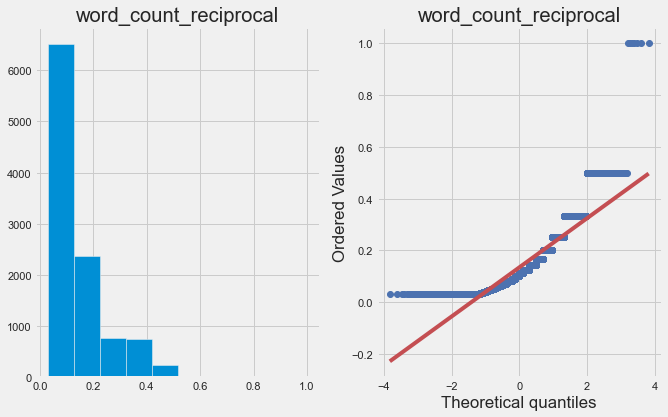

skewness is 0.5463344853309312


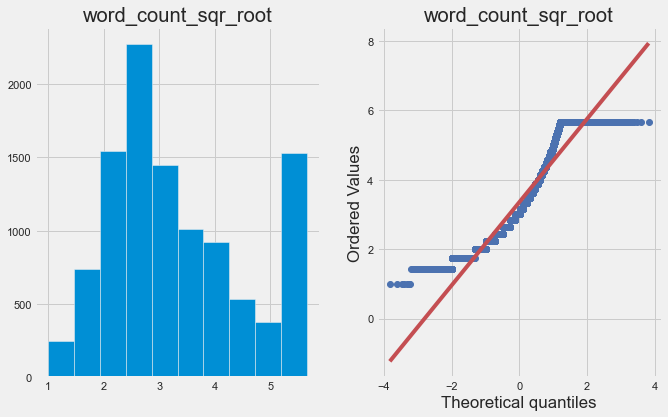

skewness is 1.5132537765137324


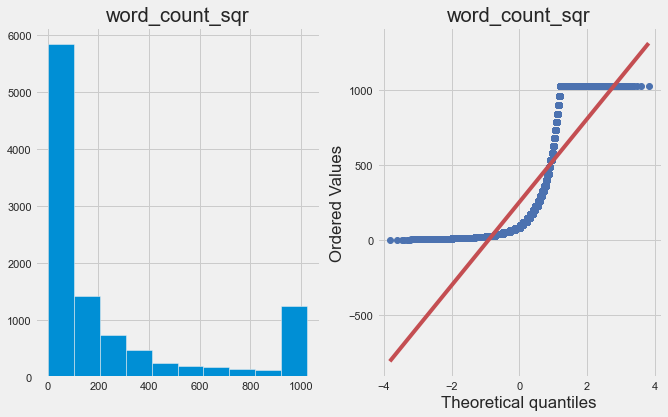

skewness is 0.8472314994375845


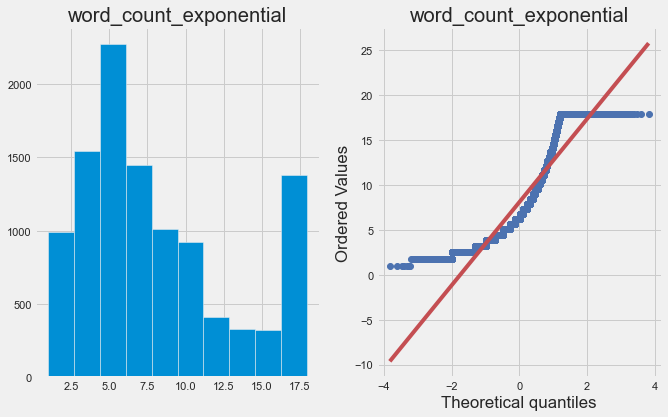

skewness is -0.003506023513942954


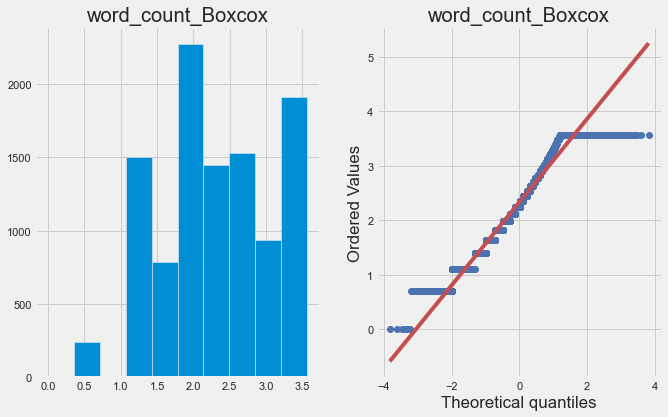

In [130]:
for i in ['word_count']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for word_count
# we gonna add it to df11

skewness is -0.003506023513942954


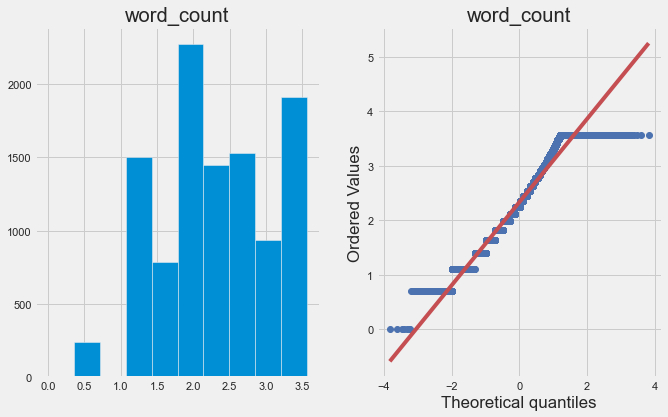

In [131]:
df11['word_count'],parameters=stat.boxcox(df11['word_count'])
plot_data(df11,'word_count')

In [132]:
# 'length_of_comment'
df12 = df11.copy()

skewness is -0.07534466052925858


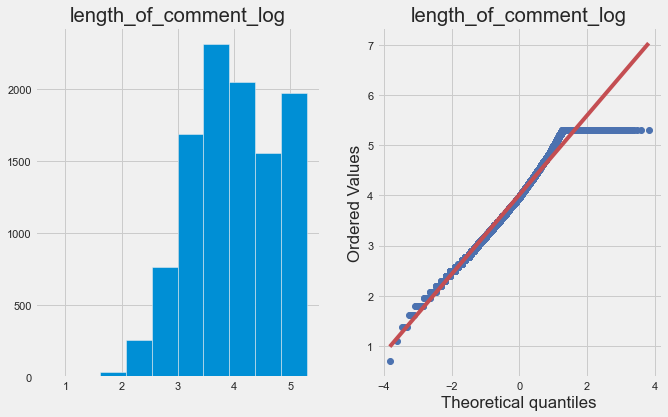

skewness is 3.3906312346939287


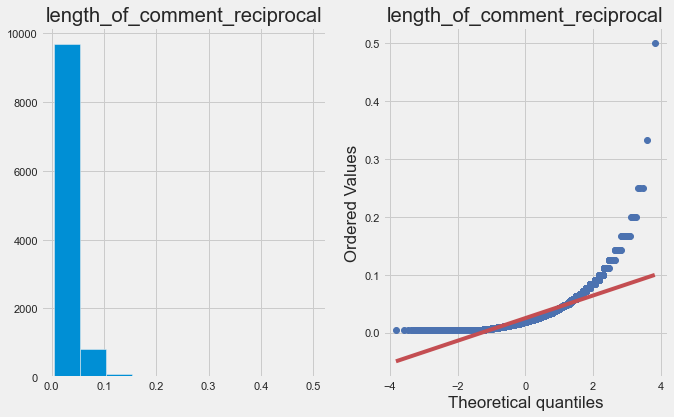

skewness is 0.5989537431060433


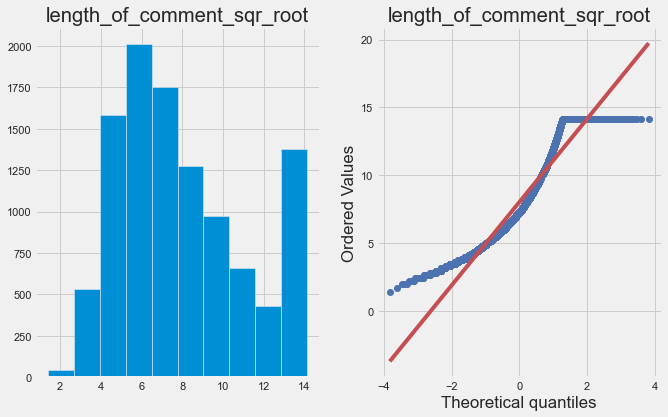

skewness is 1.6556415144731544


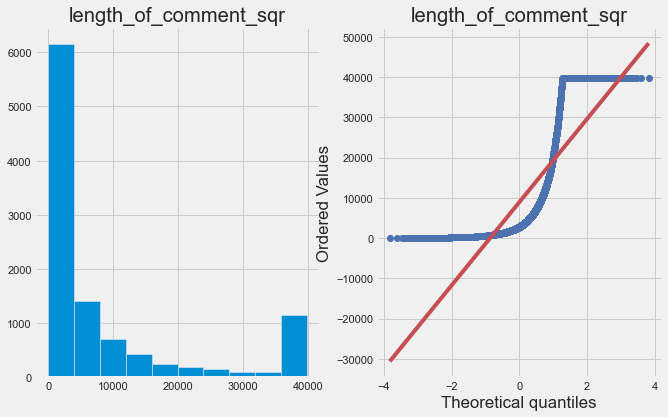

skewness is 0.93578708638139


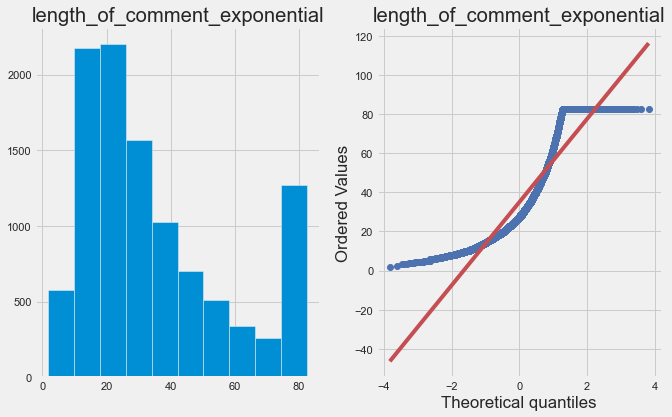

skewness is -0.007957568016225745


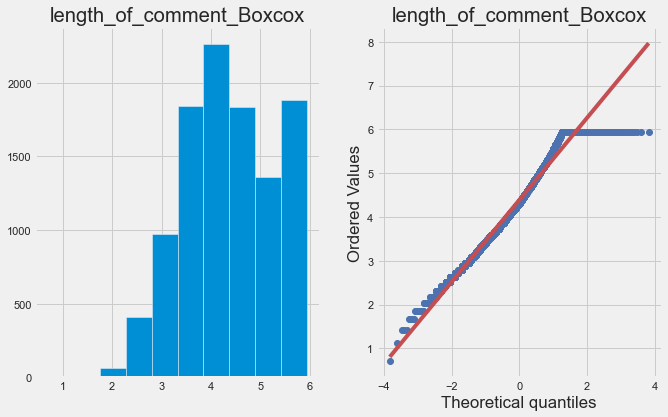

In [133]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for length_of_comment
# we gonna add it to df11

skewness is -0.007957568016225745


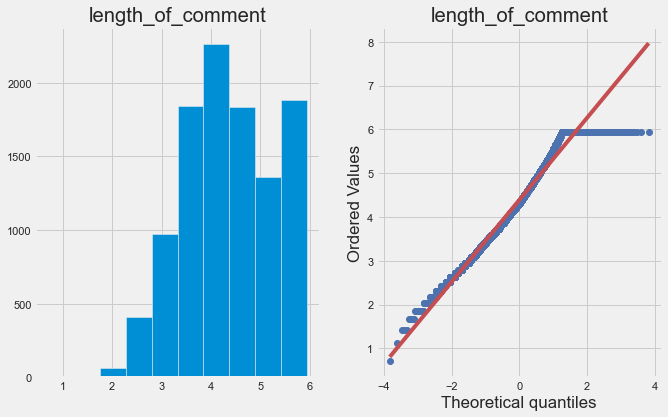

In [134]:
df11['length_of_comment'],parameters=stat.boxcox(df11['length_of_comment'])
plot_data(df11,'length_of_comment')

In [135]:
# 'post_coment_gap'
df12 = df11.copy()

skewness is -0.5759946211555528


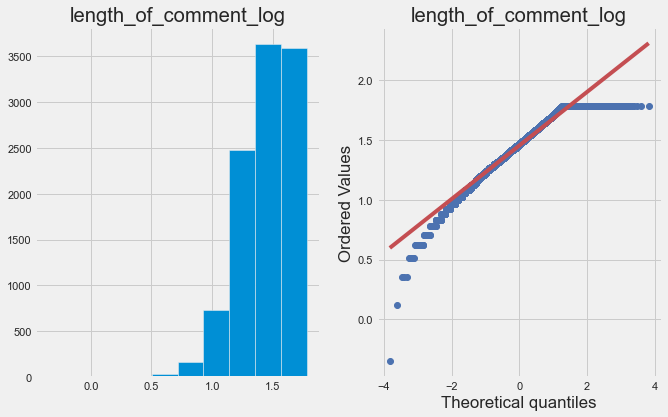

skewness is 2.0523735871810183


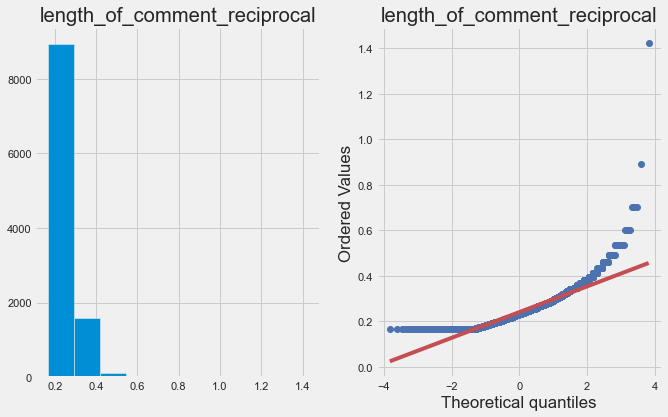

skewness is -0.2569036744366365


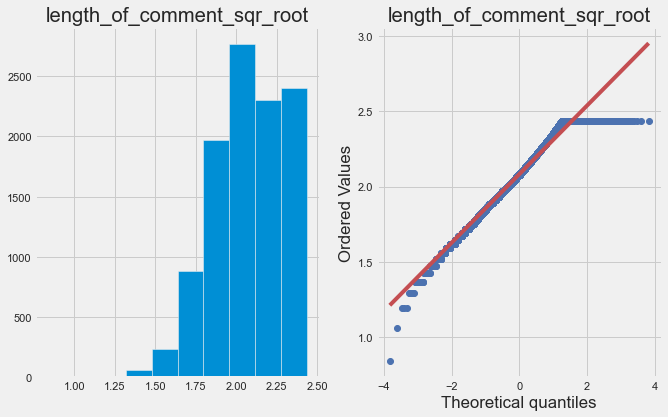

skewness is 0.3812602651765674


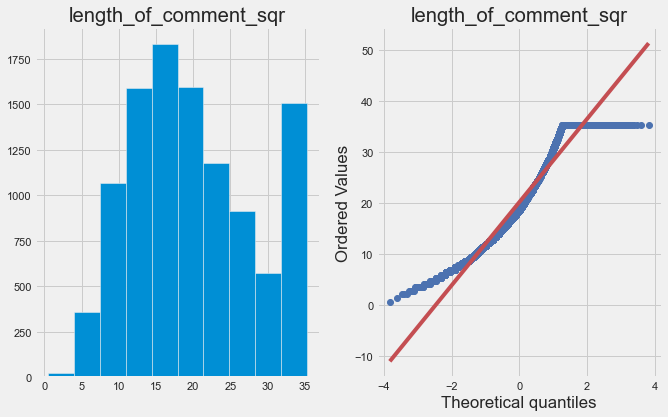

skewness is -0.08553191660787536


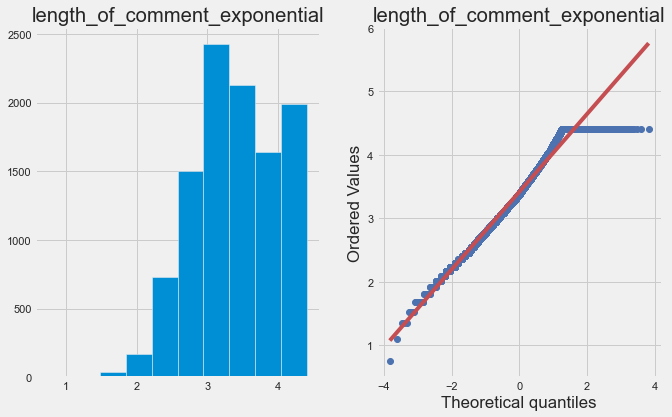

skewness is -0.042724611982218545


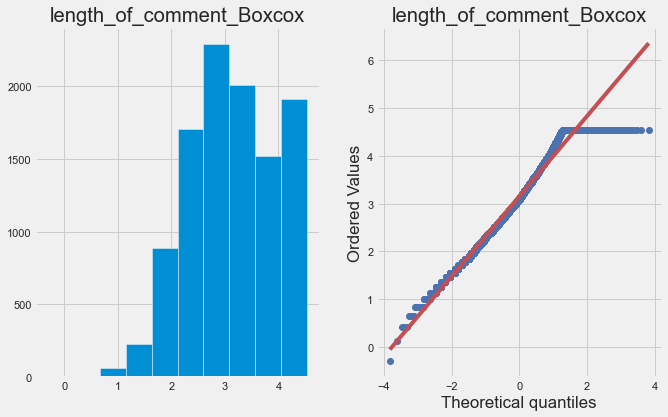

In [136]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],parameters=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for post_coment_gap
# we gonna add it to df11

skewness is -0.08113646492636564


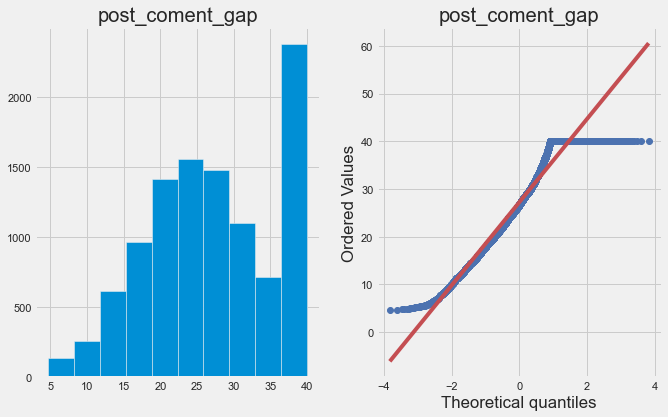

In [137]:
df11['post_coment_gap'],parameters=stat.boxcox(df11['post_coment_gap'])
plot_data(df11,'post_coment_gap')

In [ ]:
# features distribution data tranformed to a normal distribution ( not completely but closely)

In [145]:
df11.head()

,vid,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,Ugx18OdhnjkAtm4_kvF4AaABAg,0.265993,0.239773,1.402189,0.000000,1,3.137146,0.0,0,0.0,39.978929,0.200000,0,0,0,0.0,0
1,Ugy3Fx_GQfOtmO9C2kF4AaABAg,0.327118,0.222346,2.769147,0.000000,1,4.905188,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
2,UgxCTzZDv-L9XYzGWEB4AaABAg,0.433986,0.309582,3.532625,0.032258,1,5.719015,0.0,0,0.0,39.978929,0.064516,0,0,0,0.0,0
3,UgxASPCwYx4JjumZvc94AaABAg,0.201988,0.181141,1.818371,0.000000,1,3.770442,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
4,UgxYCLuvtZ2IGy0zFfl4AaABAg,0.176259,0.125743,1.402189,0.000000,1,3.011349,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0


In [146]:
df11.columns

Index(['vid', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'is_spam'],
      dtype='object')

In [147]:
df12 = df11.drop('vid',axis=1)

In [148]:
df12.columns

Index(['sim_content', 'sim_comment', 'word_count', 'duplicate_word_ratio',
       'no_of_sentences', 'length_of_comment', 'num_of_punctuations',
       'is_period_sequence', 'stop_word_ratio', 'post_coment_gap',
       'black_word_count', 'is_link', 'is_youtube_link', 'is_number',
       'comment_duplication', 'is_spam'],
      dtype='object')

In [149]:
df12.to_csv('model.csv')